In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

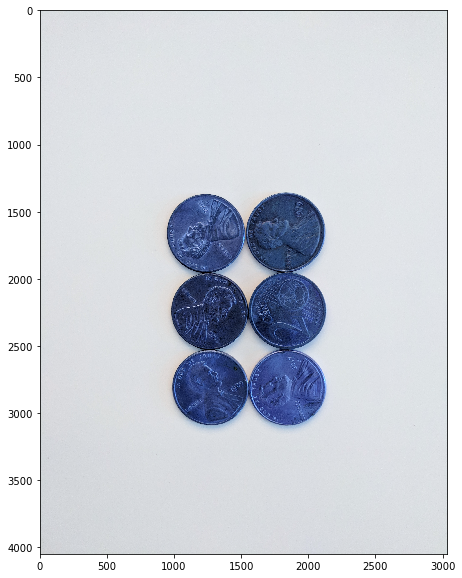

In [3]:
sep_coins = cv2.imread('pennies.jpg')
display(sep_coins)

In [4]:
# Median Blur
# Grayscale
# Binary Threshold
# Find Contours

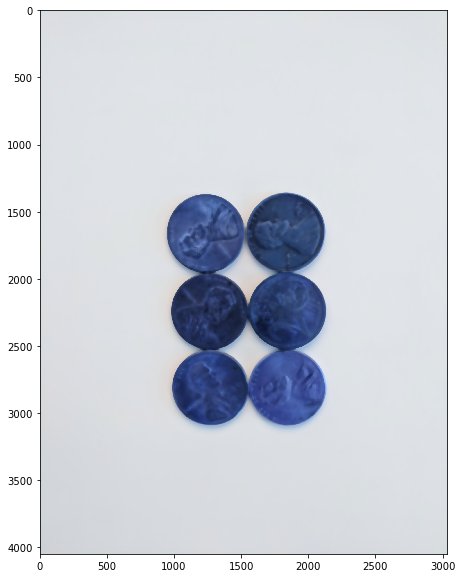

In [5]:
sep_blur = cv2.medianBlur(sep_coins,25)
display(sep_blur)

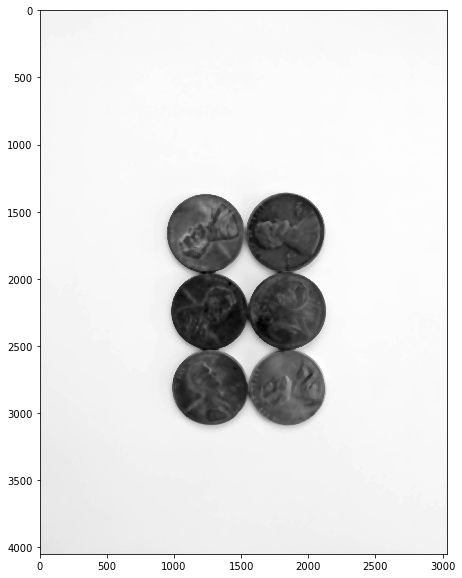

In [6]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

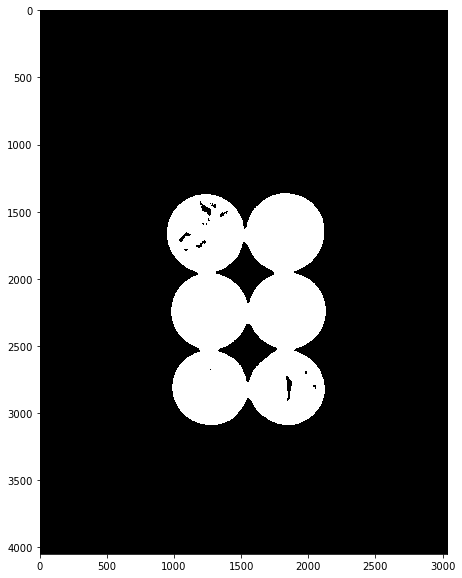

In [7]:
ret,sep_thresh = cv2.threshold(gray_sep_coins,127,255,cv2.THRESH_BINARY_INV)
display(sep_thresh)

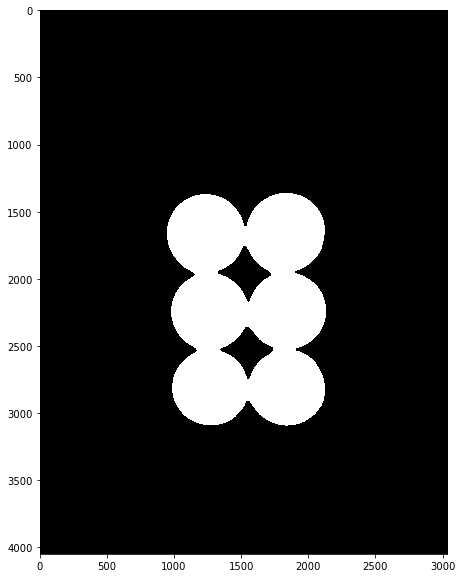

In [8]:
ret,sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)
display(sep_thresh)

In [9]:
image = sep_thresh.copy()
contours,hierarchy = cv2.findContours(image,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [10]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

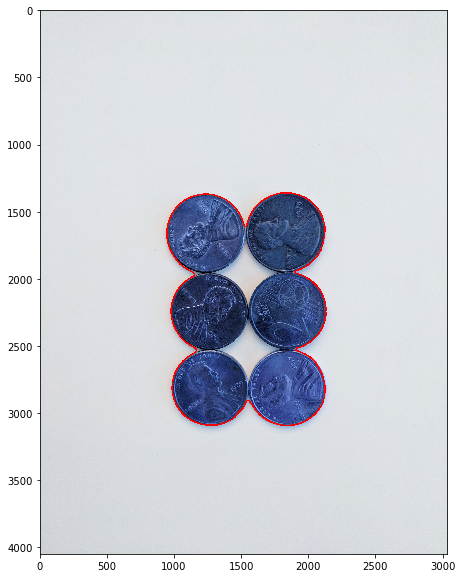

In [11]:
display(sep_coins)

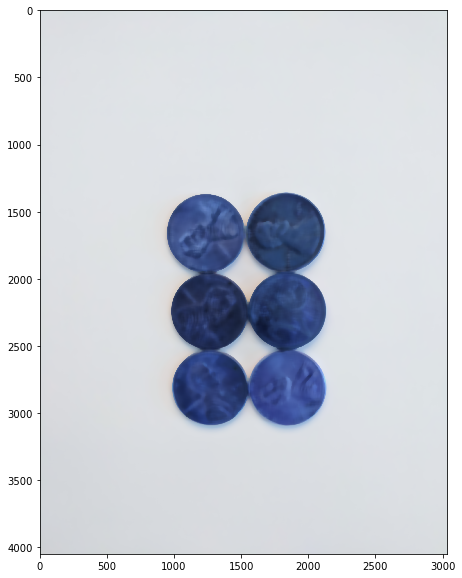

In [14]:
img = cv2.imread('pennies.jpg')
img = cv2.medianBlur(img,35)
display(img)

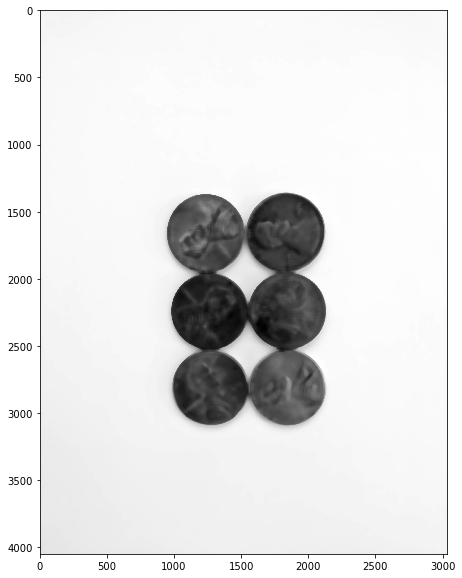

In [15]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(gray)

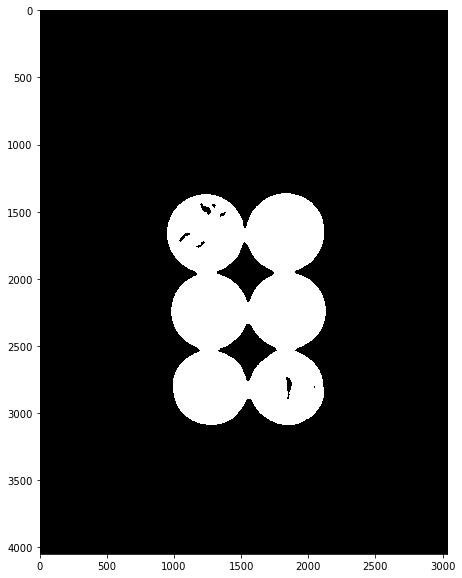

In [16]:
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
display(thresh)

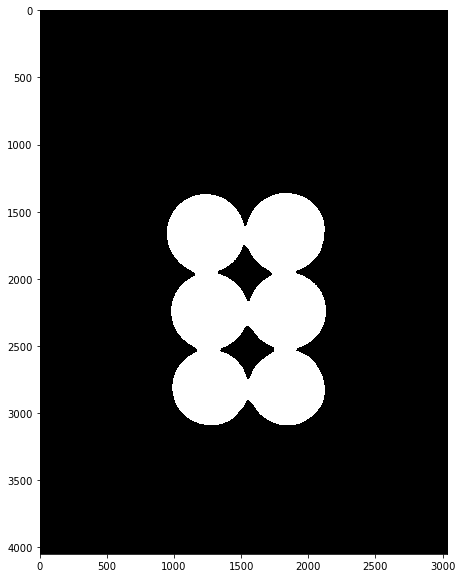

In [17]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

In [18]:
# NOISE REMOVAL (OPTIONAL)

In [19]:
kernel = np.ones((3,3),np.uint8)

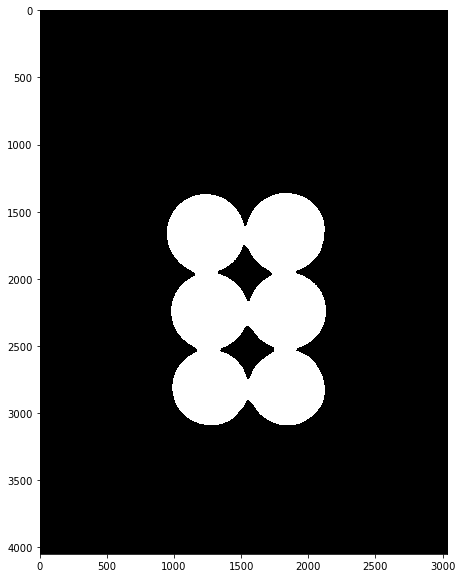

In [22]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

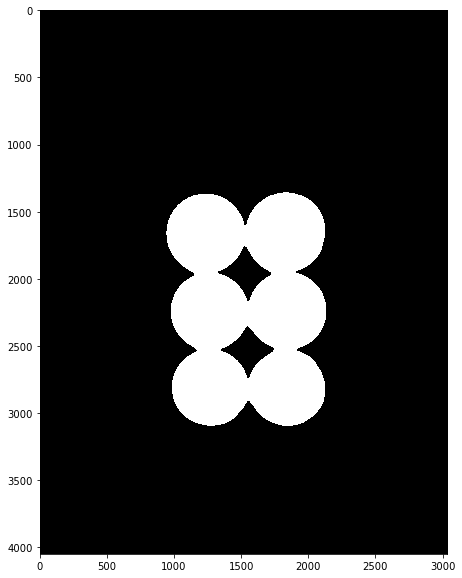

In [23]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display(sure_bg)

In [24]:
# DISTANCE TRANSFORM

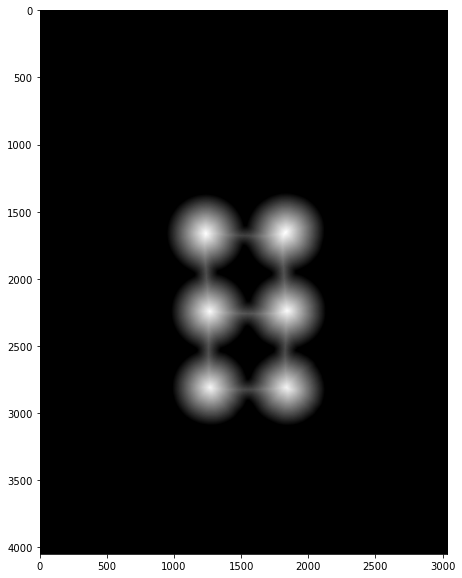

In [26]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(dist_transform)

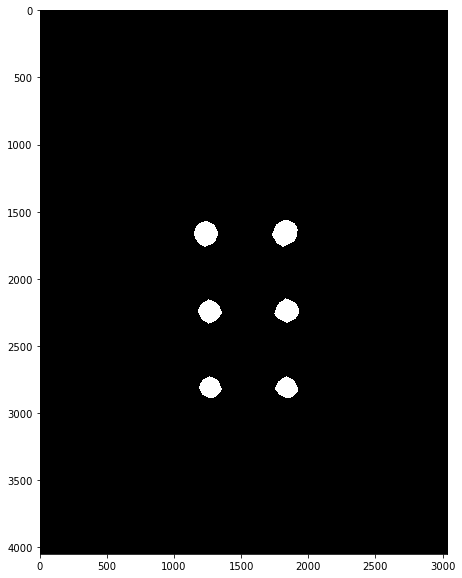

In [27]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(sure_fg)

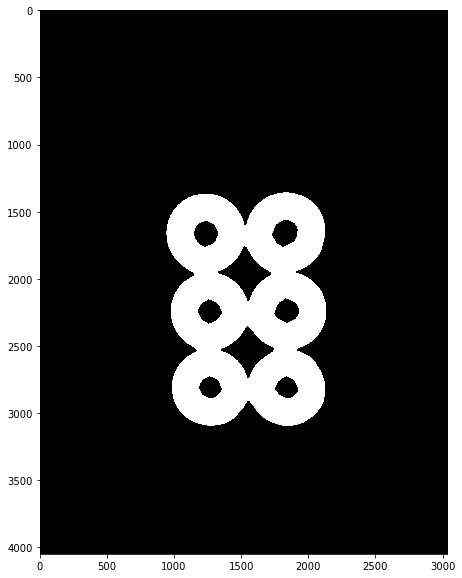

In [29]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

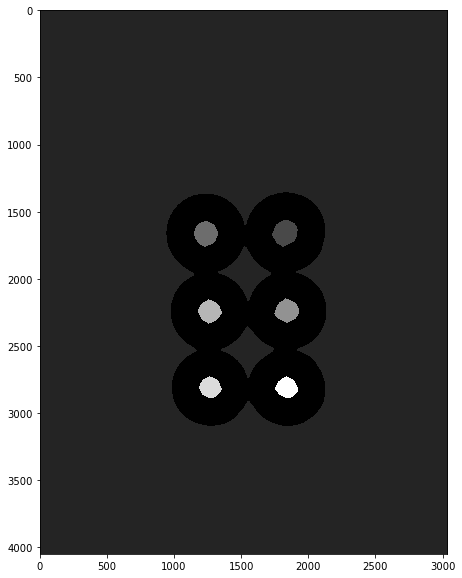

In [30]:
ret,markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0
display(markers)

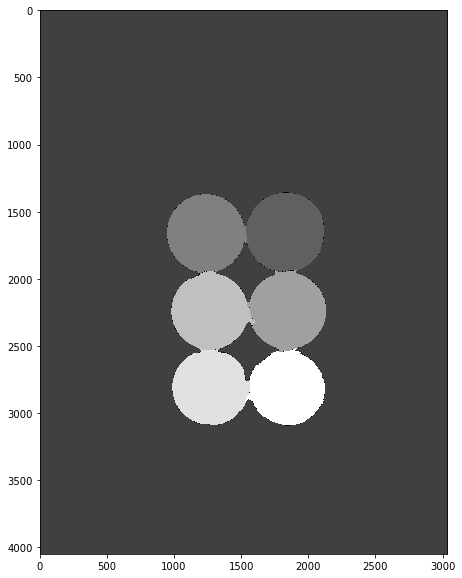

In [31]:
markers = cv2.watershed(img,markers)
display(markers)

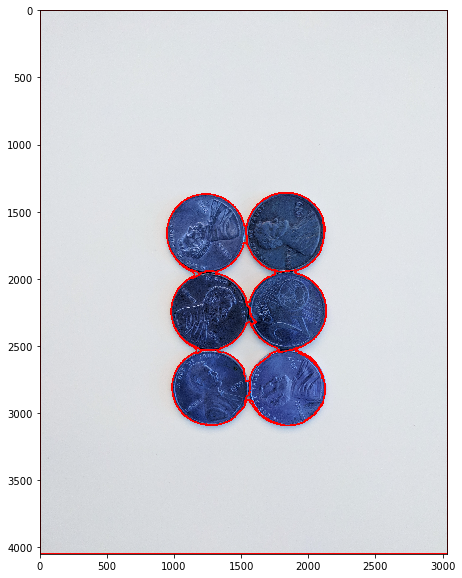

In [32]:
image = markers.copy()
contours,hierarchy = cv2.findContours(image,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

display(sep_coins)